<h1><center>Introduction to NLP</center></h1>

1. NLP (Natural Language Processing) is a field of computer science and artificial intelligence that deals with the interaction between computers and human languages.
2. Common use cases of NLP include text classification, sentiment analysis, language translation, and speech recognition.
3. Important concepts in NLP include tokenization, stemming, stop words, and n-grams.

### Task 1: Review the below code

You will use this or similar code in the exercise that follows

#### Text Cleaning and Preprocessing

Text Cleaning and Preprocessing: Techniques for preparing text data for analysis, including tokenization, stemming, and stop word removal.

In [ ]:
# Tokenization is the process of breaking down a sentence into individual words or phrases.

import nltk
# nltk.download('punkt')
# nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

text = "NLP is a field of computer science, and artificial intelligence"
tokens = word_tokenize(text)
print(tokens)

['NLP', 'is', 'a', 'field', 'of', 'computer', 'science', ',', 'and', 'artificial', 'intelligence']


[nltk_data] Downloading package punkt to /home/arpydarpy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/arpydarpy/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [4]:
# Lowercasing: Converting all text to lowercase can make it easier to analyze the text and remove case-sensitive duplicates.
text = "NLP Is a Field of Computer Science, and Artificial Intelligence"
text = text.lower()
print(text)

nlp is a field of computer science, and artificial intelligence


In [5]:
# Removing Punctuation: Punctuation marks can add noise to the text and make it harder to analyze. Removing them can make the text easier to work with.

import string

text = "NLP Is a Field of Computer Science, and Artificial Intelligence!"
text = text.translate(text.maketrans('', '', string.punctuation))
print(text)
# Output: "NLP Is a Field of Computer Science and Artificial Intelligence"


NLP Is a Field of Computer Science and Artificial Intelligence


In [6]:
# Stop words are common words that are typically removed from text data before analysis.

# nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

words = ["NLP", "is", "a", "field", "of", "computer", "science", "and", "artificial", "intelligence"]
filtered_words = [word for word in words if word.lower() not in stop_words]
print(filtered_words)

['NLP', 'field', 'computer', 'science', 'artificial', 'intelligence']


In [7]:
# Stemming is the process of reducing a word to its root form.

from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

# Define a sample text
text = "The quick brown foxes are better than lazy dogs."
tokens = text.split()

stemmed_text = ' '.join([stemmer.stem(token) for token in tokens])
print("Original Text:", text)
print("Stemmed Text:", stemmed_text)

Original Text: The quick brown foxes are better than lazy dogs.
Stemmed Text: the quick brown fox are better than lazi dogs.


In [8]:
#  Lematization
# !pip install spacy
# !python -m spacy download en_core_web_sm
import spacy
 
# Load the spaCy English model
nlp = spacy.load('en_core_web_sm')
 
# Define a sample text
text = "The quick brown foxes are better than lazy dogs."
 
# Process the text using spaCy
doc = nlp(text)
 
# Extract lemmatized tokens
lemmatized_tokens = [token.lemma_ for token in doc]
 
# Join the lemmatized tokens into a sentence
lemmatized_text = ' '.join(lemmatized_tokens)
 
# Print the original and lemmatized text
print("Original Text:", text)
print("Lemmatized Text:", lemmatized_text)

Original Text: The quick brown foxes are better than lazy dogs.
Lemmatized Text: the quick brown fox be well than lazy dog .


#### Exploratory Data Analysis

Exploratory Data Analysis (EDA) is an important step in any NLP project. It helps to understand the characteristics of the data and identify any potential issues or patterns that may be relevant to the analysis. Here are some simple examples of EDA techniques that can be applied to text data

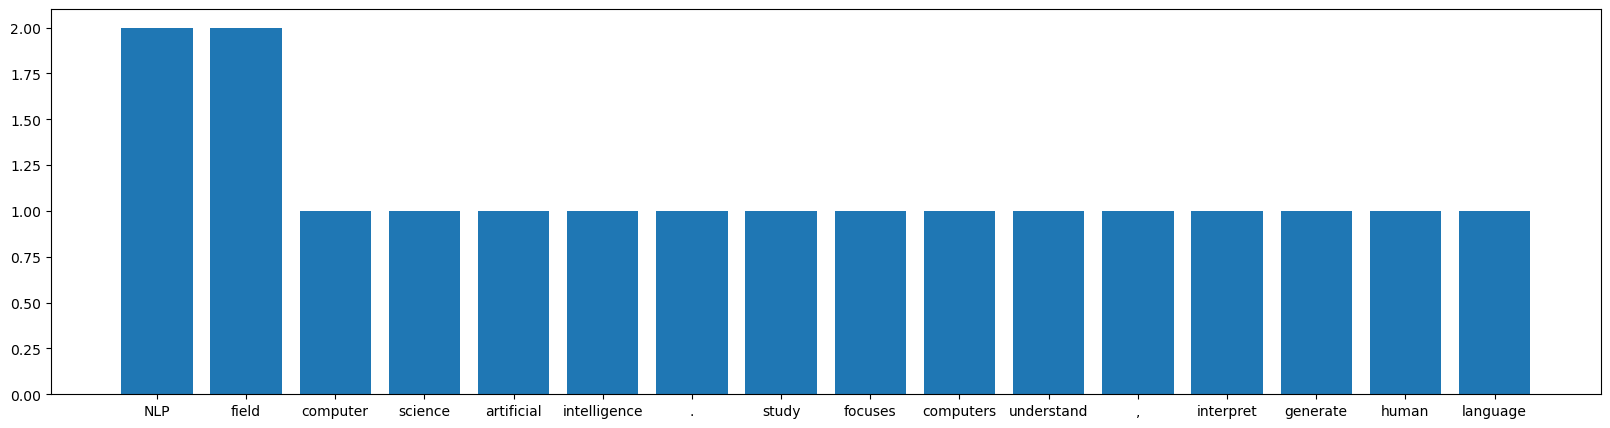

In [9]:
# Word frequency plots are used to visualize the most common words in a dataset.

from collections import Counter
import matplotlib.pyplot as plt

text = "NLP is a field of computer science and artificial intelligence. NLP is a field of study that focuses on how computers can understand, interpret and generate human language"
tokens = word_tokenize(text)
filtered_words = [word for word in tokens if word.lower() not in stop_words]

word_freq = Counter(filtered_words)

plt.figure(figsize=(20,5))
plt.bar(word_freq.keys(), word_freq.values())
plt.show()


Distribution of 3-grams:
NLP is a: 2
is a field: 2
a field of: 2
field of computer: 1
of computer science: 1
computer science and: 1
science and artificial: 1
and artificial intelligence: 1
artificial intelligence .: 1
intelligence . NLP: 1
. NLP is: 1
field of study: 1
of study that: 1
study that focuses: 1
that focuses on: 1
focuses on how: 1
on how computers: 1
how computers can: 1
computers can understand: 1
can understand ,: 1
understand , interpret: 1
, interpret and: 1
interpret and generate: 1
and generate human: 1
generate human language: 1


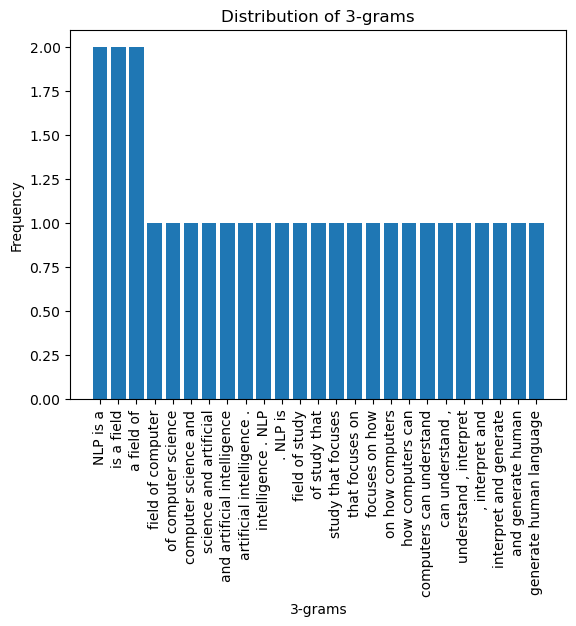

In [10]:
# Identifying common N-grams: N-grams are sequences of words. Identifying common n-grams can give insight into the most common phrases in the dataset.

import nltk
from nltk import ngrams
from collections import Counter
import matplotlib.pyplot as plt

# Sample text
sample_text = "NLP is a field of computer science and artificial intelligence. NLP is a field of study that focuses on how computers can understand, interpret and generate human language"

# Tokenize the text into words
tokens = nltk.word_tokenize(sample_text)

# Function to generate n-grams
def generate_ngrams(text, n):
    n_grams = ngrams(text, n)
    return [' '.join(gram) for gram in n_grams]

# Specify the value of n for n-grams
n_value = 3  # You can change this value to see different n-grams, e.g., 2 for bigrams, 3 for trigrams, etc.

# Generate n-grams
ngrams_list = generate_ngrams(tokens, n_value)

# Count the occurrences of each n-gram
ngrams_count = Counter(ngrams_list)

# Display the distribution
print(f"Distribution of {n_value}-grams:")
for ngram, count in ngrams_count.items():
    print(f"{ngram}: {count}")

# Plot the distribution
labels, values = zip(*ngrams_count.items())
indexes = range(len(labels))

plt.bar(indexes, values)
plt.xlabel(f'{n_value}-grams')
plt.ylabel('Frequency')
plt.xticks(indexes, labels, rotation='vertical')
plt.title(f'Distribution of {n_value}-grams')
plt.show()

#### Feature Engineering

Feature engineering is the process of creating useful features from raw text data that can be used as inputs for NLP models. 


In [11]:
# Bag-of-Words: Bag-of-Words (BoW) is a representation of text as a bag (multiset) of its words, disregarding grammar and even word order but keeping multiplicity. 
# It is one of the most common feature engineering techniques used in NLP.

from sklearn.feature_extraction.text import CountVectorizer

corpus = ["NLP is a field of computer science and artificial intelligence",
          "NLP is a field of study that focuses on how computers can understand, interpret and generate human language"]

vectorizer = CountVectorizer()
bow = vectorizer.fit_transform(corpus)

print(bow.toarray())


ModuleNotFoundError: No module named 'sklearn'

In [12]:
# TF-IDF (Term Frequency-Inverse Document Frequency): This is a technique that weighs the words based on their importance in the document. 
# It is a way to convert the raw word counts into meaningful values by multiplying the word count with the inverse of the number of documents where the word is present.

from sklearn.feature_extraction.text import TfidfVectorizer

corpus = ["NLP is a field of computer science and artificial intelligence",
          "NLP is a field of study that focuses on how computers can understand, interpret and generate human language"]

vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)
print(tfidf.toarray())


[[0.27840869 0.39129369 0.         0.39129369 0.         0.27840869
  0.         0.         0.         0.         0.39129369 0.
  0.27840869 0.         0.27840869 0.27840869 0.         0.39129369
  0.         0.         0.        ]
 [0.18665039 0.         0.26233061 0.         0.26233061 0.18665039
  0.26233061 0.26233061 0.26233061 0.26233061 0.         0.26233061
  0.18665039 0.26233061 0.18665039 0.18665039 0.26233061 0.
  0.26233061 0.26233061 0.26233061]]


In [13]:
#  N-Grams are sequences of words. Identifying common n-grams can give insight into the most common phrases in the dataset.

from sklearn.feature_extraction.text import CountVectorizer

corpus = ["NLP is a field of computer science and artificial intelligence",
          "NLP is a field of study that focuses on how computers can understand, interpret and generate human language"]

vectorizer = CountVectorizer(ngram_range=(2,2))
ngrams = vectorizer.fit_transform(corpus)
print(ngrams.toarray())


[[1 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0]
 [0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1]]


In [33]:
# Word embeddings are dense vector representations of words. 
# They capture the meaning and context of words in a way that allows them to be used as input for machine learning models.
# !pip install gensim
import gensim
from gensim.models import Word2Vec

sentences = [["NLP", "is", "a", "field", "of", "computer", "science", "and", "artificial", "intelligence"],
             ["NLP", "is", "a", "field", "of", "study", "that", "focuses", "on", "how", "computers", "can", "understand", "interpret", "and", "generate", "human", "language"]]

model = Word2Vec(sentences, min_count=1)
print(model.wv["NLP"])


[-5.4281042e-04  2.4095914e-04  5.1026721e-03  9.0126209e-03
 -9.3078930e-03 -7.1173883e-03  6.4583835e-03  8.9752581e-03
 -5.0195586e-03 -3.7619984e-03  7.3753442e-03 -1.5361811e-03
 -4.5454749e-03  6.5581338e-03 -4.8641455e-03 -1.8144455e-03
  2.8755362e-03  9.9468976e-04 -8.2854927e-03 -9.4563030e-03
  7.3152836e-03  5.0750202e-03  6.7604459e-03  7.6790544e-04
  6.3474020e-03 -3.3987791e-03 -9.4915513e-04  5.7653580e-03
 -7.5242254e-03 -3.9345538e-03 -7.5099370e-03 -9.3427731e-04
  9.5442599e-03 -7.3245829e-03 -2.3336951e-03 -1.9331368e-03
  8.0781439e-03 -5.9320750e-03  3.9558799e-05 -4.7552190e-03
 -9.5996540e-03  5.0026518e-03 -8.7660616e-03 -4.3811630e-03
 -3.0819298e-05 -2.9663555e-04 -7.6683164e-03  9.6084382e-03
  4.9903216e-03  9.2295147e-03 -8.1634624e-03  4.4921511e-03
 -4.1347388e-03  8.2715927e-04  8.4991921e-03 -4.4576772e-03
  4.5211408e-03 -6.7940247e-03 -3.5462519e-03  9.4024558e-03
 -1.5733168e-03  3.1845146e-04 -4.1401568e-03 -7.6821316e-03
 -1.5029169e-03  2.47103

#### Modelling with supervised models


These models are trained using labeled data, where the target variable (or output) is known. 
Common supervised models include text classification and Name Entity Recognition (NER).

Text classification: This is a model that is trained to classify text into one or more predefined categories. Example: classifying movie reviews as positive or negative.

In [14]:
## Text Classification Example

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# dataset
X_train = ["I watched a good movie", "This movie is terrible", "The movie was average", "I liked the movie"]
y_train = ["positive", "negative", "neutral", "positive"]
X_test = ["The movie was good", "I did not like the movie"]
y_test = ["positive", "negative"]

# feature extraction
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# model training
clf = MultinomialNB()
clf.fit(X_train, y_train)

# model prediction
y_pred = clf.predict(X_test)
print(y_pred)
print("Accuracy: ", accuracy_score(y_test, y_pred))


['positive' 'positive']
Accuracy:  0.5


**Notice that a sentence with "like" and "did not like" are both positive!**

What can be done to classify this sentence as negative?

#### Sentimental Analysis

Sentiment Analysis is a field of Natural Language Processing (NLP) that deals with determining the sentiment or emotion expressed in a piece of text. The task involves classifying a given text as positive, negative or neutral, based on the sentiment it conveys.

For example, consider a toy dataset with a few comments or statements about a product:

    "This product is amazing! I highly recommend it."
    "I was really disappointed with this product."
    "It's okay, but I've had better."
    "I can't say if it's good or bad, it's just average."

A sentiment analysis model can be trained on this dataset to predict the sentiment of each statement. The first statement would be classified as positive, the second as negative, the third as neutral, and the fourth as neutral.

The model is trained using labeled data and machine learning algorithms, such as logistic regression or recurrent neural networks. These algorithms learn patterns in the data and use that information to make predictions on new, unseen data.

Sentiment Analysis has a wide range of applications, such as in customer feedback analysis, market research, and social media monitoring. It can help businesses understand their customers' opinions, track brand reputation, and monitor the public's response to events.


Here is an example of sentiment classification using VADER lexicon and utility.

In [17]:
# Importing required libraries
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Downloading required resources
# nltk.download("vader_lexicon")

# Initializing the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Defining a function to get the sentiment score
def get_sentiment(text):
    sentiment_score = sia.polarity_scores(text)
    return sentiment_score["compound"]

# Testing the model on a sample text
text = "This product is amazing! I highly recommend it."
sentiment = get_sentiment(text)
print(sentiment)
if sentiment > 0:
    print("Positive")
elif sentiment == 0:
    print("Neutral")
else:
    print("Negative")


0.7836
Positive


As you can see, VADER does not need training, it is an unsupervised method, and it can classify a sentence quite well. 

But is is better than more complex supervised classifiers? You will answer this question in your Assignment 1

### Task 2: Complete the code


Start with tweets_small.tsv dataset. When your code is working, then switch to tweets1.tsv, which will take longer to process.

If you have time, you can experiment with other vectoriser types, like count vectorizer or WordVectors

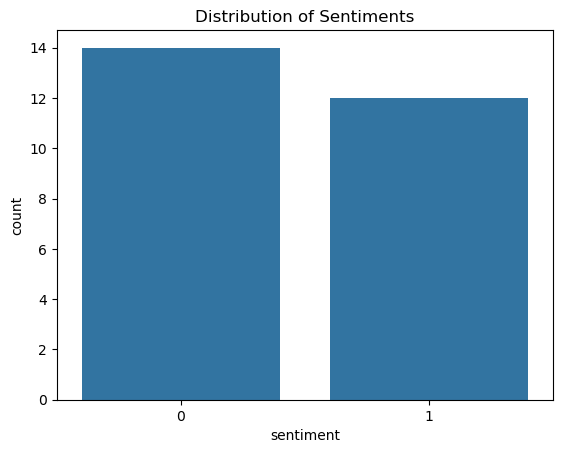

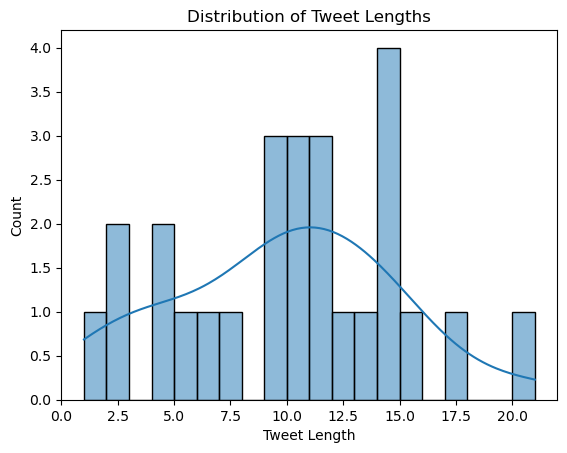

Multinomial Naive Bayes:
Accuracy: 0.625
F1 score: 0.5714285714285714
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.40      1.00      0.57         2

    accuracy                           0.62         8
   macro avg       0.70      0.75      0.62         8
weighted avg       0.85      0.62      0.64         8

SVM:
Accuracy: 0.5
F1 score: 0.3333333333333333
              precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.25      0.50      0.33         2

    accuracy                           0.50         8
   macro avg       0.50      0.50      0.47         8
weighted avg       0.62      0.50      0.53         8



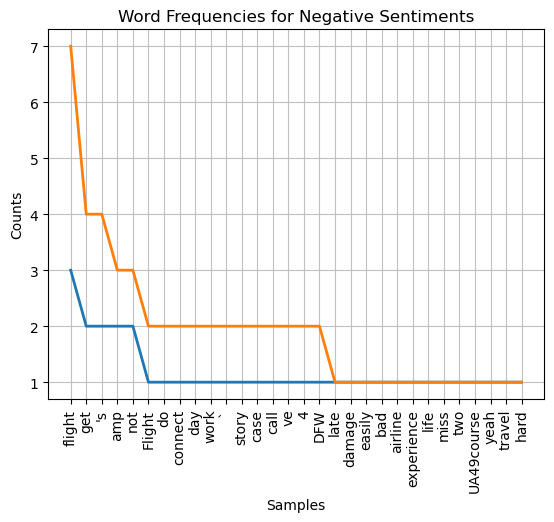

In [19]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
import nltk
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
import regex as re
import seaborn as sns

import spacy
# Load the spaCy English model
nlp = spacy.load('en_core_web_sm')

# Load the dataset
data = pd.read_csv("tweets_small.tsv", encoding="ISO-8859-1", delimiter="\t", header=None)
# data = pd.read_csv("tweets1.tsv", encoding="ISO-8859-1", delimiter="\t", header=None)
data.columns = ["text", "sentiment"]

def clean_text(text):
    # Remove urls
    text = re.sub(r"http\S+", "", text)
    
    # Remove '@' character using regex
    text = re.sub(r"@\w+","",str(text))
    
    # Remove non-ASCII characters
    text = ''.join([char for char in text if ord(char) < 128])
    
    # Tokenize the text
    tokens =  word_tokenize(text)
    
    # Remove stopwords and punctuation
    stop_words = stopwords.words("english") + list(string.punctuation)
    tokens =  [token for token in tokens if token.lower() not in set(stop_words)]
    text1 = " ".join(tokens)

    # Lemmatize the tokens
    doc = nlp(text1)
    tokens = [token.lemma_ for token in doc] 
    
    # Return the cleaned text as a string
    return " ".join(tokens)

# Apply the function to the text column
data["clean_text"] =  data["text"].apply(clean_text)

# Display distribution of sentiments
sns.countplot(x='sentiment', data=data)
plt.title('Distribution of Sentiments')
plt.show()

# Analyze the distribution of tweet lengths
data['tweet_length'] = data['clean_text'].apply(lambda x: len(x.split()))
sns.histplot(data['tweet_length'], bins=20, kde=True)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.show()

# Function to get word frequencies for a given sentiment: either 0 (negative) or 1 (positive)
# Use FreqDist function
def get_word_frequencies(sentiment):
    filtered_text = data[data['sentiment'] == sentiment]['clean_text']
    text = ''.join(filtered_text)
    tokens = text.split()
    fdist = FreqDist(tokens)
    return fdist

# Plot word frequencies for positive sentiment
positive_frequencies = get_word_frequencies(1)
# plt.figure(figsize=(12, 6))
plt.title('Word Frequencies for Positive Sentiments')
positive_frequencies.plot(30, cumulative=False)
# plt.show()

# Plot word frequencies for negative sentiment
negative_frequencies = get_word_frequencies(0)
# plt.figure(figsize=(12, 6))
plt.title('Word Frequencies for Negative Sentiments')
negative_frequencies.plot(30, cumulative=False)
# plt.show()

# Split the data into train 70% and test sets 30%
X_train, X_test, y_train, y_test = train_test_split(data["clean_text"], data["sentiment"], test_size=0.3, random_state=42)

# Vectorize the text using TF-IDF default parameters
vectorizer = TfidfVectorizer()
# vectorizer = CountVectorizer(lowercase=True, token_pattern='[a-zA-Z0-9@#$%_]{2,}', \
#                                  max_features=None)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train a Multinomial Naive Bayes classifier default parameters
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# Train a SVM classifier kernel and C=1
svm = SVC(kernel="linear", C=1)
svm.fit(X_train, y_train)

# Evaluate the models on the test set
y_pred_mnb = mnb.predict(X_test)
y_pred_svm = svm.predict(X_test)

print("Multinomial Naive Bayes:")
print("Accuracy:", accuracy_score(y_test, y_pred_mnb))
print("F1 score:", f1_score(y_test, y_pred_mnb))
print(classification_report(y_test, y_pred_mnb))

print("SVM:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("F1 score:", f1_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


In followng exercise you will experiment with unsupervised learning of sentiment. 

Since you know that there are two classes, positive and negative, you can set the number of clusters to 2.

You will use two types of text representation: TF-IDF. and WordVectors. Implement both and see which one does better (using Silhouette score).

Why do you think one is better than the other?

In [55]:
# text clustering

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
from sklearn import metrics
import gensim
from gensim.models import Word2Vec


# dataset
text_list = data["clean_text"]


# feature extraction from clean_text using TF-IDF
vectorizer = TfidfVectorizer()
X = <your code>

# model training
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

# cluster assignments
clusters = kmeans.labels_

score = metrics.silhouette_score(X, clusters, metric='euclidean')
print("Silhouette score for TF-IDF: ",score)

# feature extraction and text vectorisation uing WordVectors
tokens = <your code> # tokenise text_list 
model = Word2Vec(tokens, min_count=1)
vectors = model.wv.vectors
vectors.shape

# # model training
kmeans = KMeans(n_clusters=2)
kmeans.fit(vectors)

# cluster assignments
clusters = kmeans.labels_
score = metrics.silhouette_score(vectors, clusters, metric='euclidean')
print("Silhouette score for WordVectors: ",score)


C:\Users\a1231060\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for TF-IDF:  0.005961508146163468


C:\Users\a1231060\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for WordVectors:  0.90085
